In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

C:\Users\vaibhav.javadekar\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\vaibhav.javadekar\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [9]:
subset = df.head(50)
# Considering only living area and price in this dataset
space = subset['sqft_living']
price = subset['price']

In [14]:
# Change X into 2D array
X = np.array(space).reshape(-1, 1)
Y = np.array(price)

In [25]:
# Split Train and Test Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=1/3, random_state=0) 
Y_train

array([ 488000.,  450000.,  719000.,  650000.,  580500.,  687500.,
        395000.,  861990.,  385000.,  685000.,  229500.,  400000.,
        233000., 1225000.,  485000.,  625000., 1350000.,  538000.,
        310000.,  640000.,  329000.,  257500.,  252700.,  550000.,
       2000000.,  230000.,  323000.,  605000.,  210490.,  604000.,
        221900.,  785000.,  309000.])

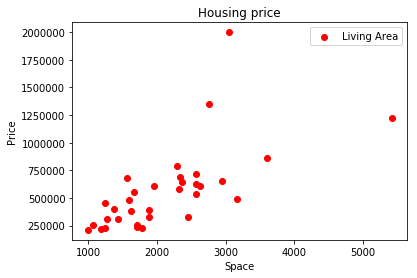

In [30]:
# Visualize training set
plt.scatter(X_train, Y_train, c='red', label = "Living Area")
plt.title("Housing price")
plt.xlabel("Space")
plt.ylabel("Price")
plt.legend()
plt.show()

In [27]:
#Train
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#Predict
Y_predict = regressor.predict(X_test)

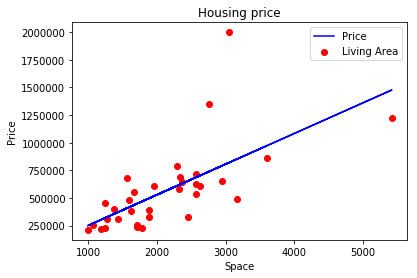

In [32]:
# Visualize training set again
plt.scatter(X_train, Y_train, c='red', label = "Living Area")
plt.title("Housing price")
plt.plot(X_train,regressor.predict(X_train),color="blue",label="Price")
plt.xlabel("Space")
plt.ylabel("Price")
plt.legend()
plt.show()

In [35]:
# Predicting if area is 2400 then what would be its price
area = 2400

price = regressor.predict([[area]])
print("House of %d sq-ft cost about $%d" %(area, price))

House of 2400 sq-ft cost about $639594
